In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as  plt
from sklearn.cluster import KMeans
import matplotlib.animation as animation

In [ ]:
df = load_iris()
classes = load_iris().target_names
target = df.target

In [ ]:
a  = np.random.randn(1,5)
b = np.random.randn(1,5)
a*b

array([[ 0.81181274,  0.94206448, -0.22289632,  0.29326705,  0.09738306]])

In [ ]:
classes

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

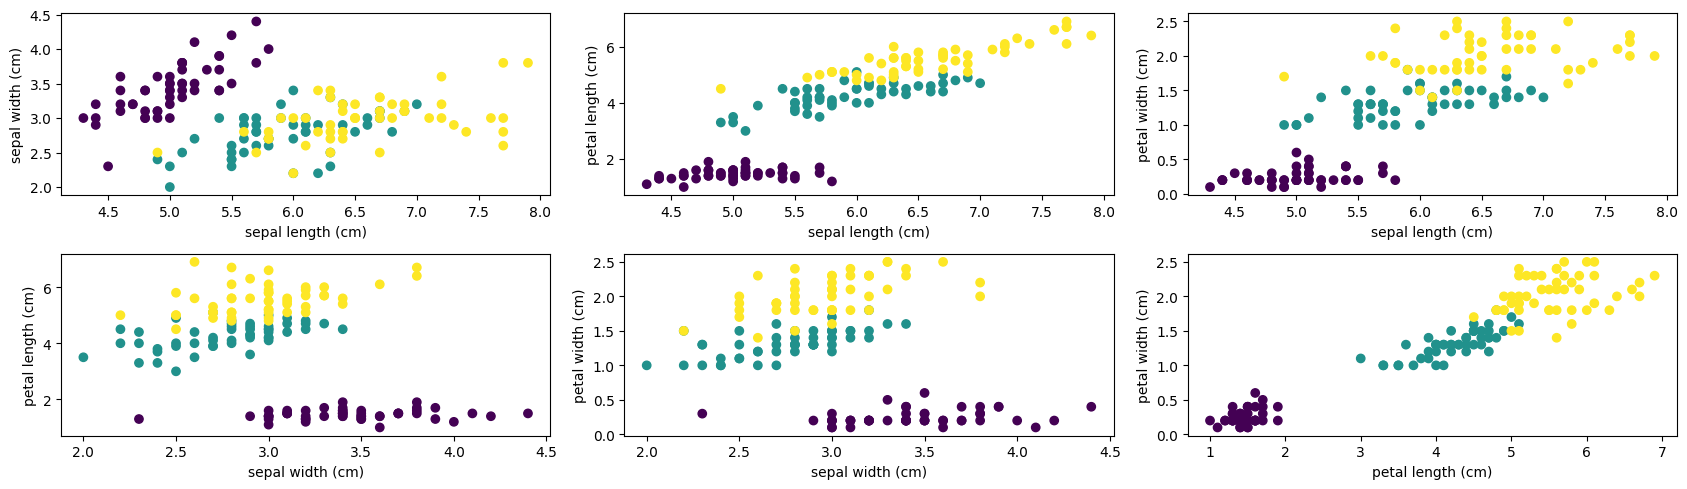

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (17,5))
ax = ax.flatten()
p = 0
for i in range(4):
  for j in range(4):
    if i < j:
      ax[p].scatter(df.data[:,i:i+1],df.data[:,j:j+1] , c = target, label = classes)
      ax[p].set_xlabel(df.feature_names[i])
      ax[p].set_ylabel(df.feature_names[j])
      p += 1

fig.tight_layout()



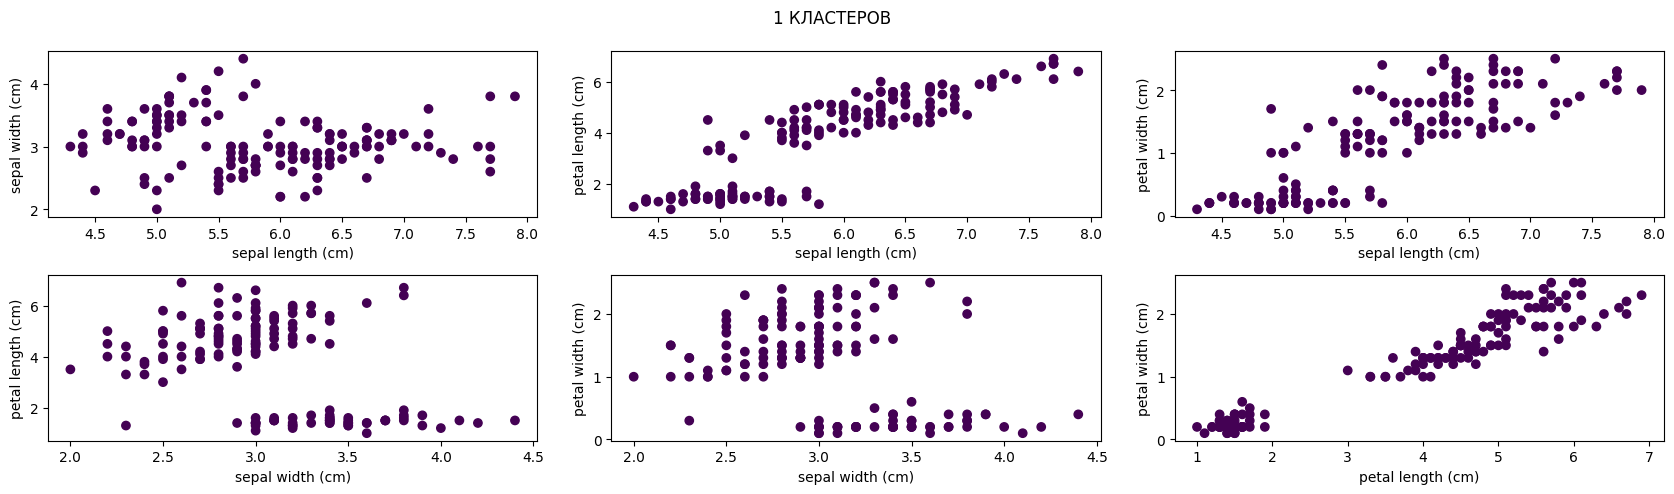

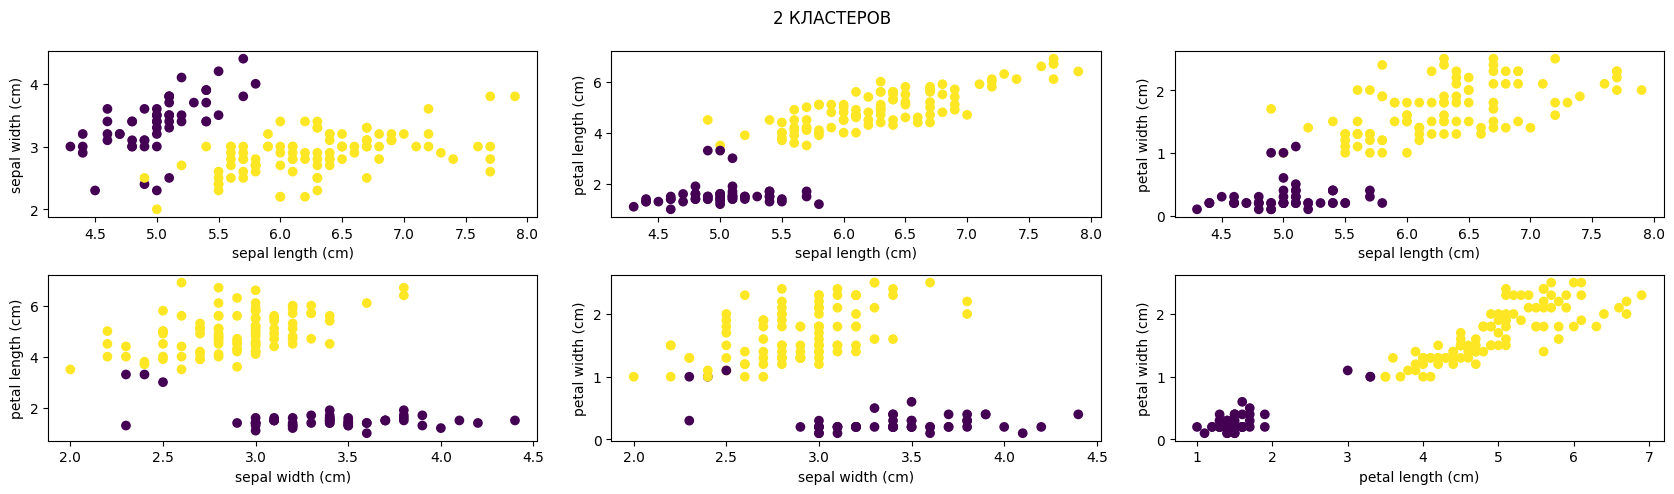

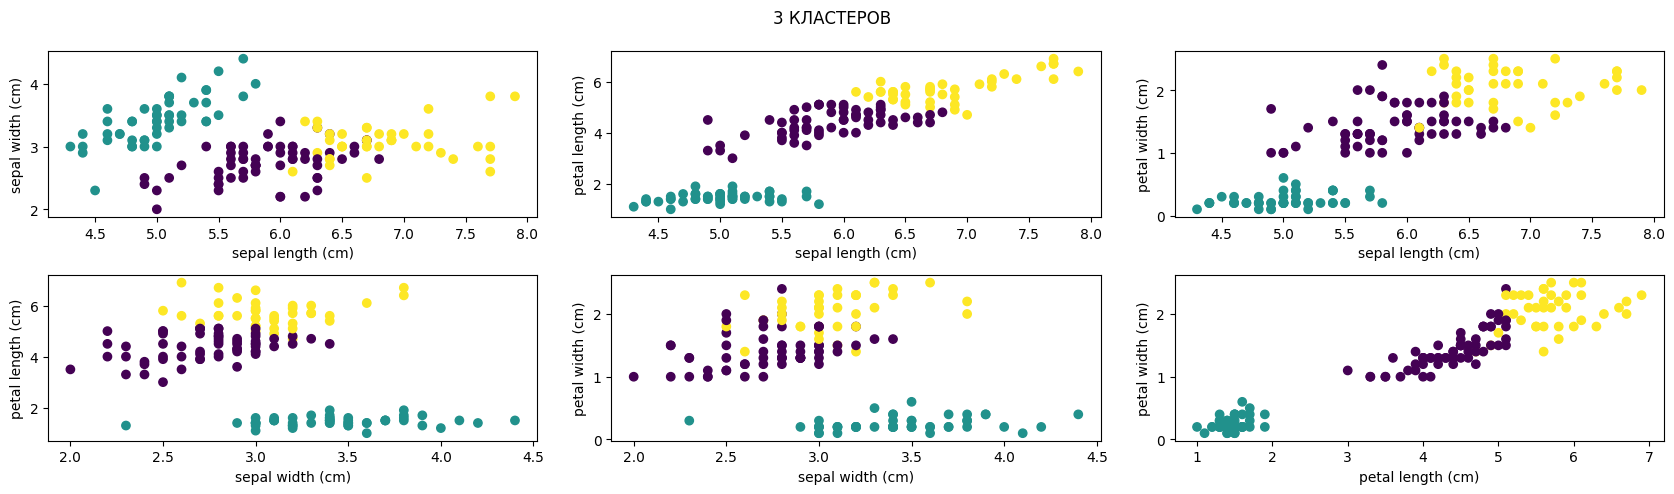

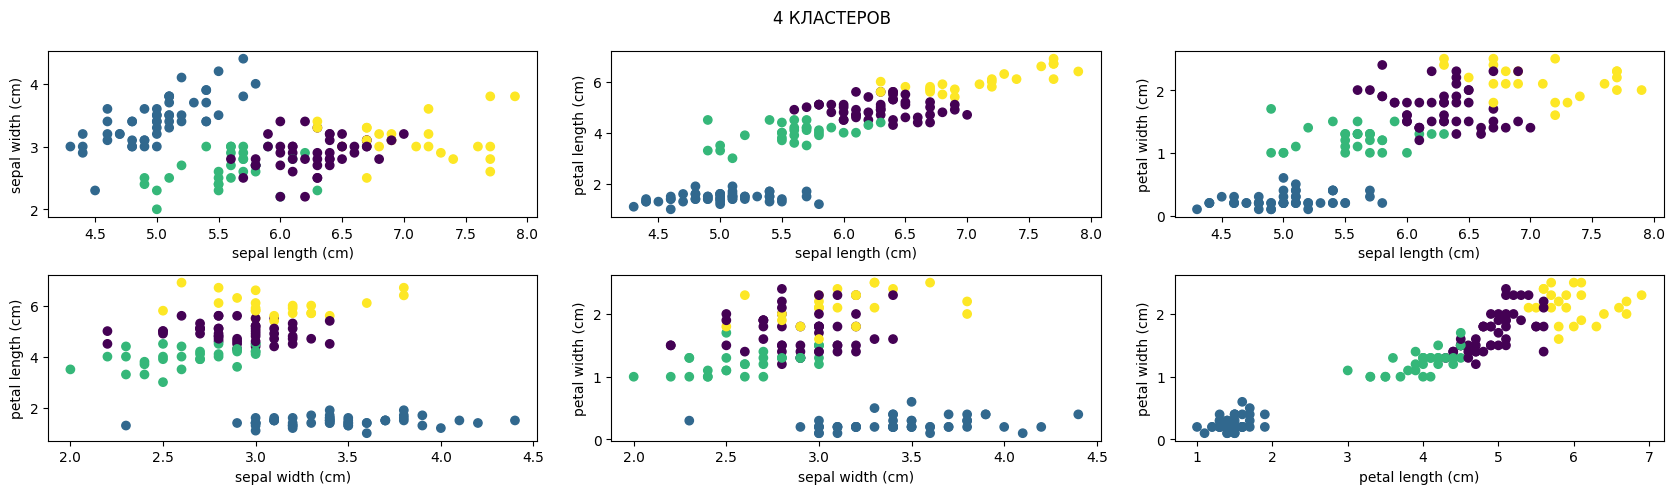

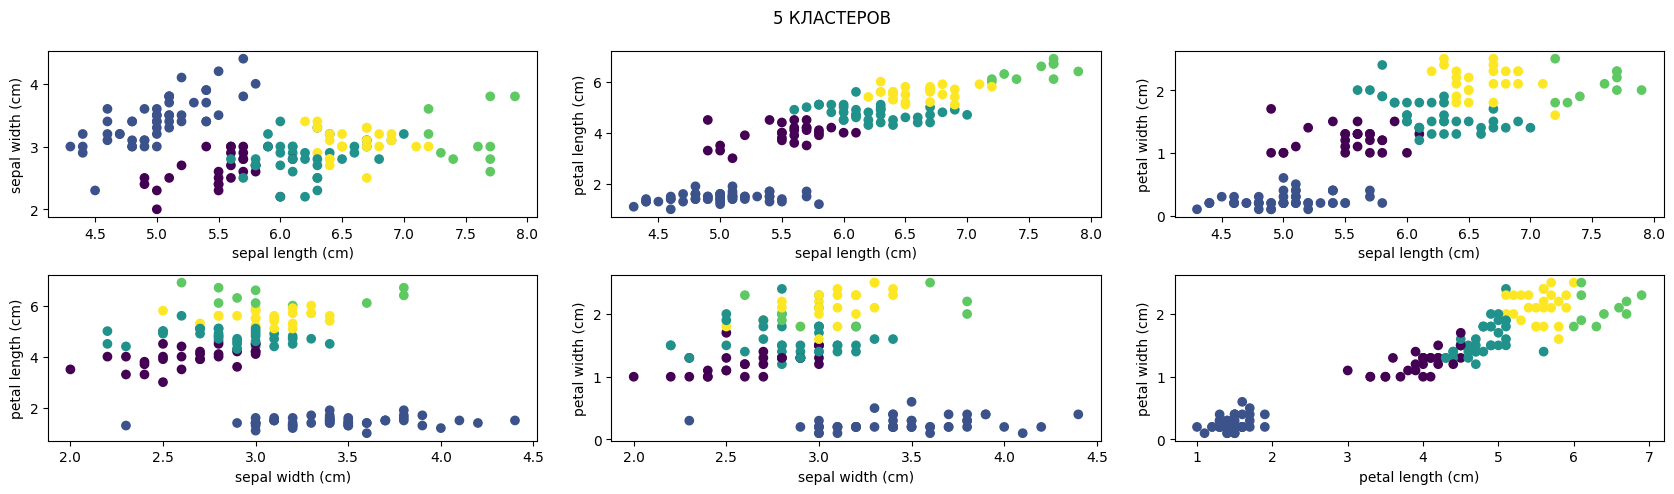

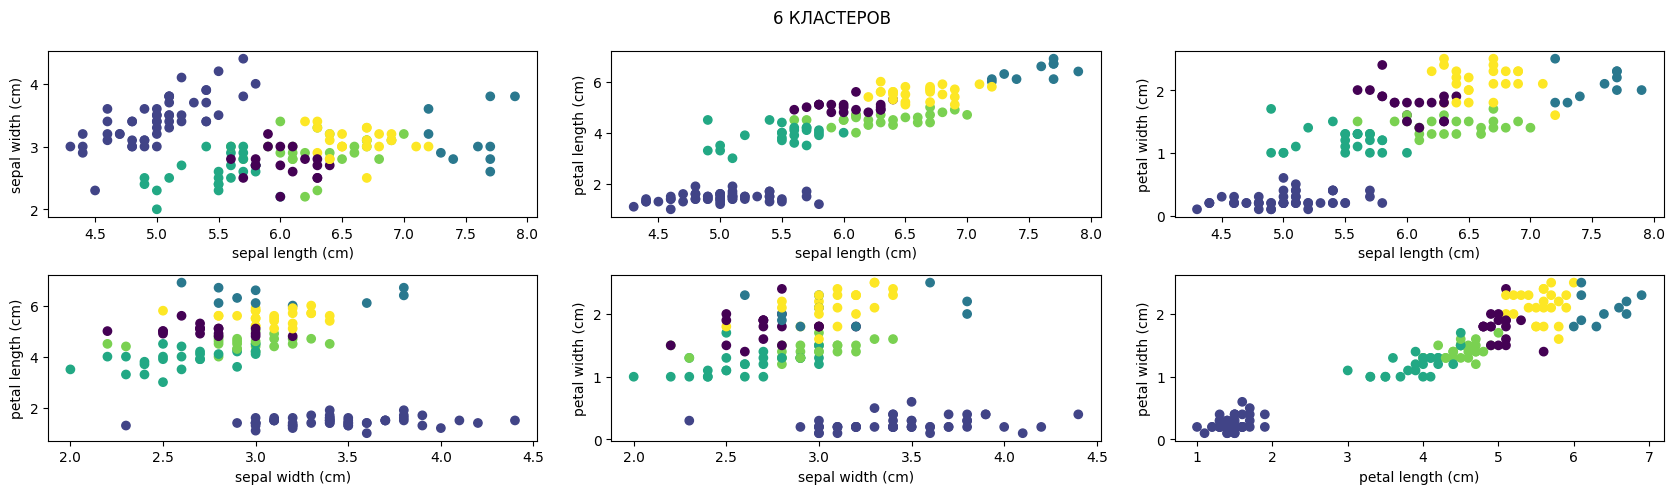

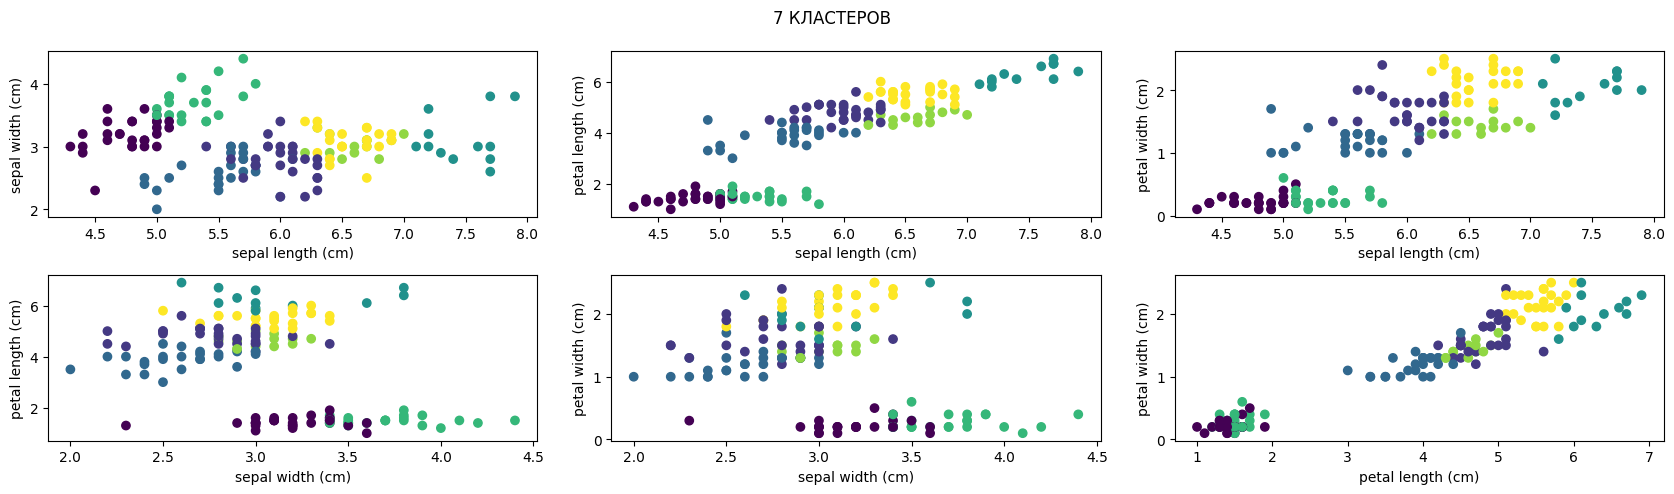

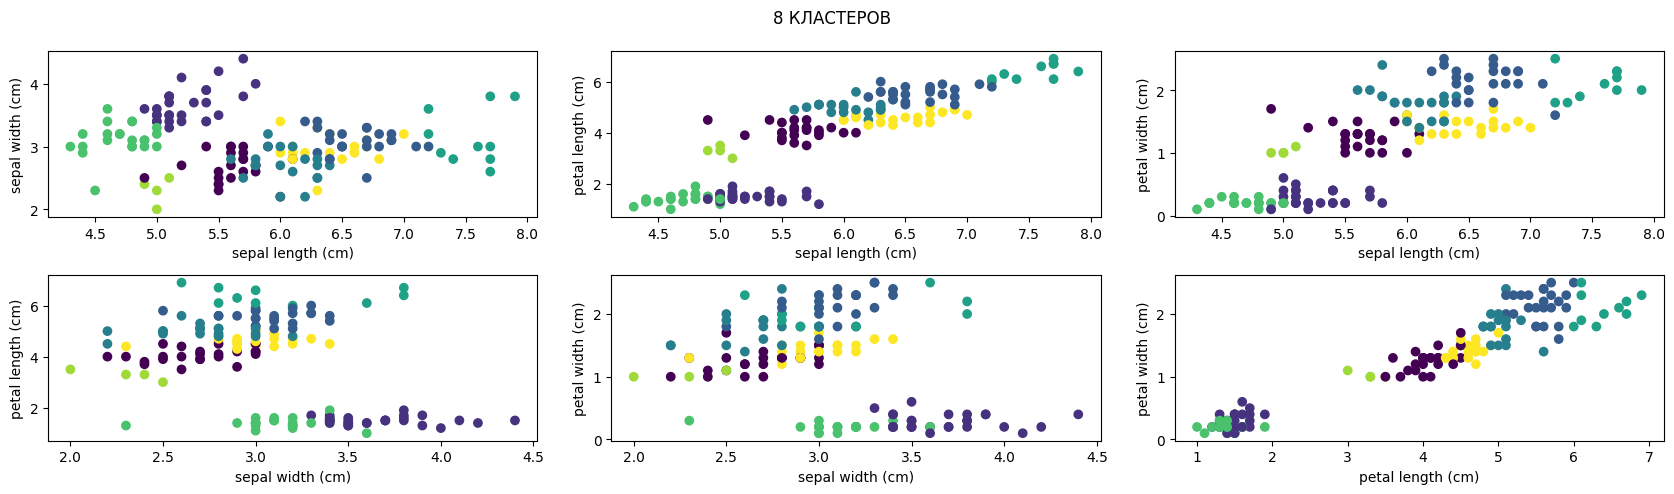

In [ ]:

inertia = []
figures = []
for k in range(1,9):
  kmeans = KMeans(n_clusters  = k)
  labls = kmeans.fit_predict(df.data)
  inertia.append(kmeans.inertia_)
  fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (17,5))
  plt.suptitle(f"{k} КЛАСТЕРОВ")
  ax = ax.flatten()
  p = 0
  for i in range(4):
    for j in range(4):
      if i < j:
        ax[p].scatter(df.data[:,i:i+1],df.data[:,j:j+1] , c = labls, label = classes)
        ax[p].set_xlabel(df.feature_names[i])
        ax[p].set_ylabel(df.feature_names[j])
        p += 1

  fig.tight_layout()
  figures.append(fig)



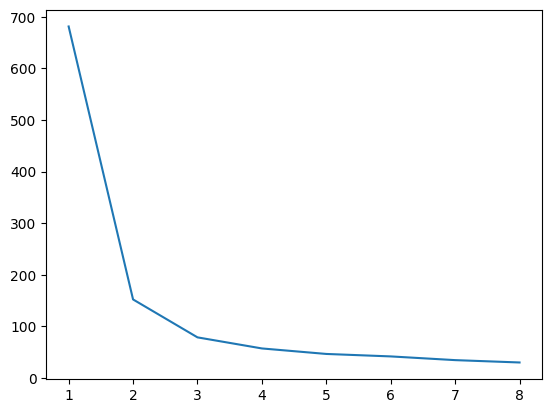

In [ ]:
plt.plot(range(1,9), inertia)

In [ ]:
class Kmean:
  def get_clusters(self):
    clusters = np.ones((1,self.data.shape[1]))
    means =  np.mean(self.data,axis = 0)
    ranges = (np.max(self.data,axis = 0) - np.min(df.data,axis = 0))*0.1
    for i in range(self.n_clusters):
      randoms = np.random.rand(1,self.data.shape[1])*2-1
      random_ranges = np.multiply(randoms,ranges)
      clusters = np.vstack([clusters,means +  random_ranges])
    return clusters[1:]

  def __init__(self,data_points,n_clusters = 3, metric = "euclidea"):
    self.n_clusters = n_clusters
    self.data = data_points
    self.clusters = self.get_clusters()
    self.silhouette_score = 0
    self.distances = np.zeros((self.data.shape[0],n_clusters))
    self.targets = 0

  def get_silhouette_score(self):
    target_and_point = np.column_stack([self.data,self.targets])
    target_and_point = np.hstack([target_and_point,np.zeros((self.targets.shape[0],1))])
    self.silhouette_score =  target_and_point
    for point in range(self.data.shape[0]):
      a = np.linalg.norm(self.data[np.where(target_and_point[:,4] == self.targets[point])] - self.data[point]).mean()
      second_nearest = np.argsort(np.linalg.norm(self.clusters - self.data[point],axis = 1))[1]
      b = np.linalg.norm(self.data[np.where(target_and_point[:,4] == second_nearest)] - self.data[point]).mean()
      value = (b - a) / max(a,b)
      target_and_point[point,5] = value
    self.silhouette_score =  target_and_point[:,5]


  def fit_transform(self,epsilon = 5e-2):
    iterations = 0
    previous_clasters = 10
    while ((iterations < 5) and (np.linalg.norm(self.clusters - previous_clasters) > epsilon)):
      previous_clasters = np.copy(self.clusters)
      for i in range(df.data.shape[0]):
        for j in range(self.n_clusters):
          self.distances[i,j] = np.linalg.norm(self.clusters[j] - self.data[i])
        #self.distances[i][self.distances[i] > self.distances[i].min()] = 0
        self.targets = self.distances.argmin(axis = 1)
      for k in range(self.n_clusters):
            self.clusters[k] = self.data[np.argwhere(self.distances.argmin(axis = 1) == k).transpose()[0]].mean(axis = 0)
    iterations +=1






In [ ]:
model = Kmean(n_clusters = 3,data_points=df.data)

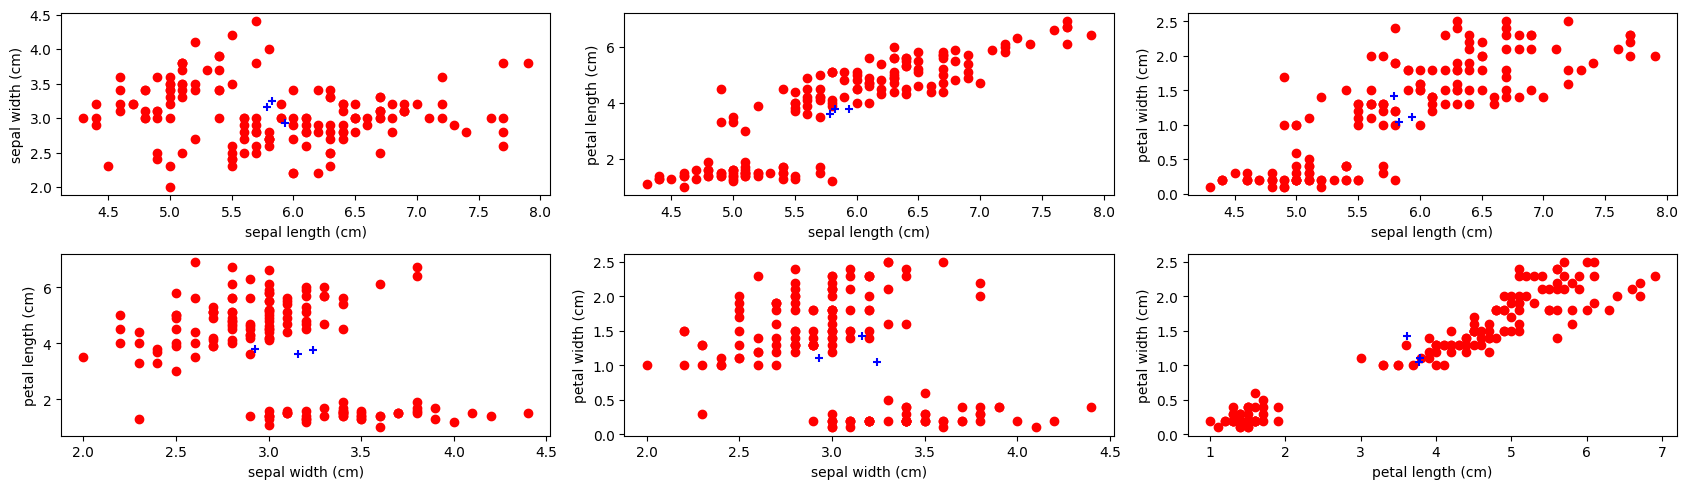

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (17,5))
axes = axes.flatten()
p = 0
for i in range(4):
  for j in range(4):
    if i < j:
      axes[p].scatter(df.data[:,i:i+1],df.data[:,j:j+1],color = "red")
      axes[p].scatter(x = model.clusters[:,i], y =model.clusters[:,j], marker = "+" , color = "blue")
      axes[p].set_xlabel(df.feature_names[i])
      axes[p].set_ylabel(df.feature_names[j])
      p += 1
fig.tight_layout()


In [ ]:
model.fit_transform()

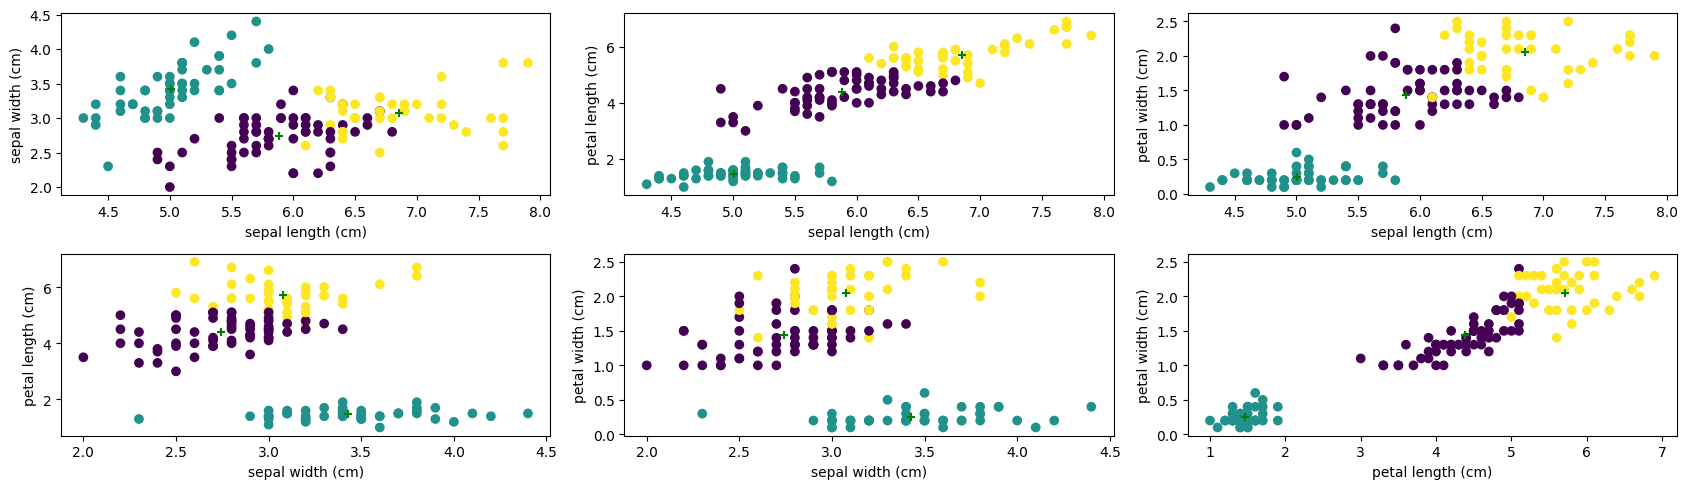

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (17,5))
axes = axes.flatten()
p = 0
for i in range(4):
  for j in range(4):
    if i < j:
      axes[p].scatter(df.data[:,i:i+1],df.data[:,j:j+1],c = model.targets )
      axes[p].scatter(x = model.clusters[:,i], y =model.clusters[:,j], marker = "+" , color = "green")
      axes[p].set_xlabel(df.feature_names[i])
      axes[p].set_ylabel(df.feature_names[j])
      p += 1
fig.tight_layout()

In [ ]:
df.data[np.argwhere(a.argmin(axis = 1) == 0).transpose()[0]].mean(axis=0)

array([5.88360656, 2.74098361, 4.38852459, 1.43442623])

In [ ]:
a = df.target
b = df.data


In [ ]:
c = np.column_stack([b,a])
c.shape
df.target.shape

(150,)

In [ ]:
a = model.get_silhouette_score()
model.silhouette_score

array([ 0.85312535,  0.81546771,  0.82855743,  0.8033436 ,  0.85159352,
        0.75623718,  0.82638542,  0.85331337,  0.75748081,  0.82462177,
        0.80582965,  0.83842882,  0.81005002,  0.75711353,  0.71990479,
        0.66515778,  0.78375926,  0.85150349,  0.72033937,  0.82373871,
        0.79447525,  0.82940003,  0.80899501,  0.80467961,  0.78907647,
        0.80353657,  0.83696826,  0.84245436,  0.84585609,  0.8173195 ,
        0.81396208,  0.80749247,  0.77388793,  0.73447942,  0.82655992,
        0.83806556,  0.80420268,  0.84773157,  0.77244686,  0.85015808,
        0.85307026,  0.66466617,  0.79112837,  0.81164394,  0.76189552,
        0.8094556 ,  0.81798355,  0.81750794,  0.81954886,  0.85199535,
        0.20708302,  0.18731465,  0.28887258,  0.48056127,  0.16953856,
        0.48525793,  0.07129429,  0.15870701,  0.1334109 ,  0.46309681,
        0.28795565,  0.47500238,  0.43329682,  0.32129839,  0.49679863,
        0.11328489,  0.44445438,  0.49739679,  0.33167051,  0.49

0